In [1]:
import numpy
from scipy import ndimage, signal
from galpy.util import bovy_conversion, bovy_plot
import gd1_util
from gd1_util import R0, V0
import seaborn as sns
%pylab inline

Populating the interactive namespace from numpy and matplotlib


# Some peppering of a GD-1 like stream

In [2]:
def nsubhalo(m):
    return 0.3*(10.**6.5/m)
def rs(m):
    return 1.05/R0*(m/10.**8.)**0.5
def dNencdm(m,Xrs=3.):
    return sdf_pepper.subhalo_encounters(sigma=120./220.,nsubhalo=nsubhalo(m),bmax=Xrs*rs(m))

Single time

In [3]:
sdf_smooth= gd1_util.setup_gd1model()
print "Stream length in arc degree and physical kpc", sdf_smooth.length(ang=True), sdf_smooth.length(phys=True)
sdf_pepper= gd1_util.setup_gd1model(timpact=[1./bovy_conversion.time_in_Gyr(V0,R0)])

Stream length in arc degree and physical kpc 93.229868813 12.370921687


/Users/bovy/anaconda/lib/python2.7/site-packages/scipy/signal/spectral.py:767: UserWarning: nperseg = 256, is greater than input length = 201, using nperseg = 201
  'using nperseg = {1:d}'.format(nperseg, x.shape[-1]))



(0.1, 100.0)

/Users/bovy/anaconda/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):



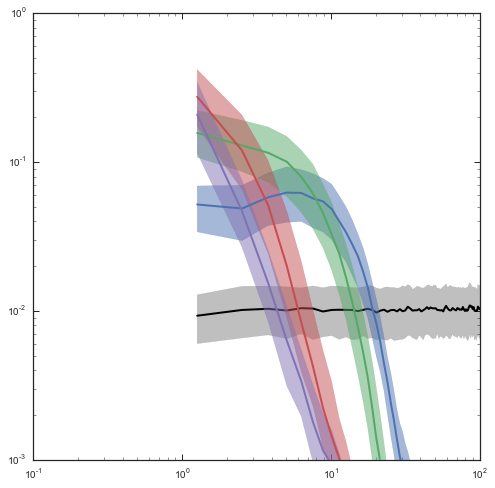

In [4]:
figsize(8,8)
smooth_len= 0
ntrials= 1001
apars= numpy.linspace(0.2,sdf_smooth.length(),201)
#Run one simulation to setup power-spectrum x axis
sdf_pepper.simulate(rate=1.,sample_GM=lambda: 10.**-2./bovy_conversion.mass_in_1010msol(V0,R0),
                    sample_rs=rs)
px= sdf_pepper.csd(apars=apars)[0]
ppy= numpy.zeros((len(px),ntrials))
ppy_err= numpy.zeros((len(px),ntrials))
all_ppy= []
for kk,m in enumerate([10.**5.5,10.**6.5,10.**7.5,10.**8.5]):
    for ii in range(ppy.shape[1]):
        # Simulate
        sdf_pepper.simulate(rate=dNencdm(m,Xrs=3.),
                            sample_GM=lambda: m/10.**10./bovy_conversion.mass_in_1010msol(V0,R0),
                            sample_rs=lambda x: rs(x*bovy_conversion.mass_in_1010msol(V0,R0)*10.**10.),
                            Xrs=3.)
        ppy[:,ii]= ndimage.filters.gaussian_filter1d(sdf_pepper.csd(d1='density',
                                                                    d2='density',
                                                                    apars=apars)[1].real,
                                                     smooth_len)
        if kk == 0:
            mock_dens= 0.1*numpy.random.normal(size=len(apars))
            ppy_err[:,ii]= signal.csd(mock_dens,mock_dens,
                                      fs=1./(apars[1]-apars[0]),scaling='spectrum')[1].real
    loglog(px,numpy.sqrt(numpy.median(ppy,axis=1)),lw=2.,color=sns.color_palette()[kk],zorder=kk+6)
    ppy.sort(axis=1)
    fill_between(px,numpy.sqrt(ppy[:,int(numpy.round(0.25*ntrials))]),
                numpy.sqrt(ppy[:,int(numpy.round(0.75*ntrials))]),
                color=sns.color_palette()[kk],zorder=kk+2,
                alpha=0.5)
    all_ppy.append(ppy)
# Also plot error
loglog(px,numpy.sqrt(numpy.median(ppy_err,axis=1)),lw=2.,color='k',zorder=1)
ppy_err.sort(axis=1)
fill_between(px,numpy.sqrt(ppy_err[:,int(numpy.round(0.25*ntrials))]),
             numpy.sqrt(ppy_err[:,int(numpy.round(0.75*ntrials))]),
             color='0.5',zorder=0,
             alpha=0.5)
ylim(0.001,1.)
xlim(0.1,100.)

(0.1, 100.0)

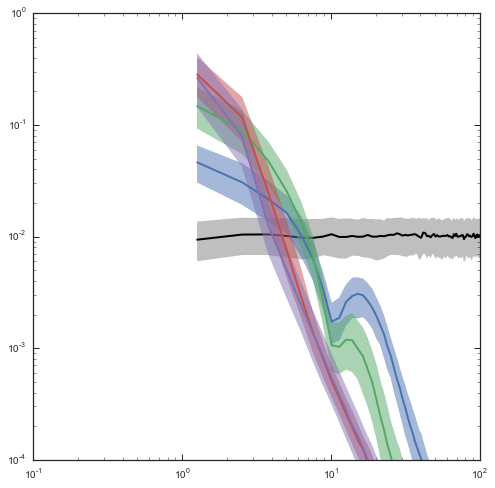

In [5]:
figsize(8,8)
smooth_len= 0
ntrials= 1001
apars= numpy.linspace(0.2,sdf_smooth.length(),201)
#Run one simulation to setup power-spectrum x axis
sdf_pepper.simulate(rate=1.,sample_GM=lambda: 10.**-2./bovy_conversion.mass_in_1010msol(V0,R0),
                    sample_rs=rs)
px= sdf_pepper.csd(apars=apars)[0]
ppy= numpy.zeros((len(px),ntrials))
ppy_err= numpy.zeros((len(px),ntrials))
all_ppy= []
for kk,m in enumerate([10.**5.5,10.**6.5,10.**7.5,10.**8.5]):
    for ii in range(ppy.shape[1]):
        # Simulate
        sdf_pepper.simulate(rate=dNencdm(m,Xrs=3.),
                            sample_GM=lambda: m/10.**10./bovy_conversion.mass_in_1010msol(V0,R0),
                            sample_rs=lambda x: rs(x*bovy_conversion.mass_in_1010msol(V0,R0)*10.**10.),
                            Xrs=3.)
        ppy[:,ii]= ndimage.filters.gaussian_filter1d(sdf_pepper.csd(d1='meanOmega',
                                                                    d2='meanOmega',
                                                                    apars=apars)[1].real,
                                                     smooth_len)
        if kk == 0:
            mock_mO= 0.1*numpy.random.normal(size=len(apars))
            ppy_err[:,ii]= signal.csd(mock_mO,mock_mO,
                                      fs=1./(apars[1]-apars[0]),scaling='spectrum')[1].real
    loglog(px,numpy.sqrt(numpy.median(ppy,axis=1)),lw=2.,color=sns.color_palette()[kk],zorder=kk+6)
    ppy.sort(axis=1)
    fill_between(px,numpy.sqrt(ppy[:,int(numpy.round(0.25*ntrials))]),
                numpy.sqrt(ppy[:,int(numpy.round(0.75*ntrials))]),
                color=sns.color_palette()[kk],zorder=kk+2,
                alpha=0.5)
    all_ppy.append(ppy)
# Also plot error
loglog(px,numpy.sqrt(numpy.median(ppy_err,axis=1)),lw=2.,color='k',zorder=1)
ppy_err.sort(axis=1)
fill_between(px,numpy.sqrt(ppy_err[:,int(numpy.round(0.25*ntrials))]),
             numpy.sqrt(ppy_err[:,int(numpy.round(0.75*ntrials))]),
             color='0.5',zorder=0,
             alpha=0.5)
ylim(0.0001,1.)
xlim(0.1,100.)

(0.1, 100.0)

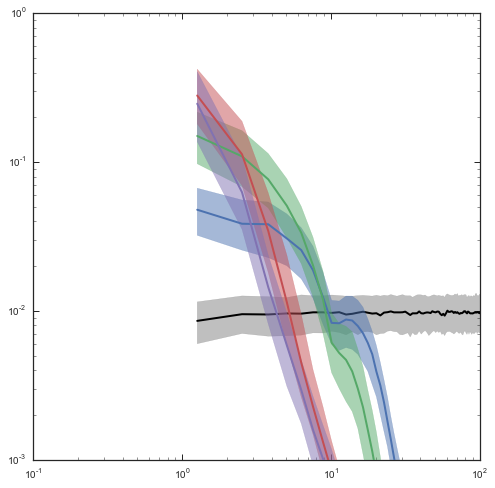

In [7]:
figsize(8,8)
smooth_len= 0
ntrials= 1001
apars= numpy.linspace(0.2,sdf_smooth.length(),201)
#Run one simulation to setup power-spectrum x axis
sdf_pepper.simulate(rate=1.,sample_GM=lambda: 10.**-2./bovy_conversion.mass_in_1010msol(V0,R0),
                    sample_rs=rs)
px= sdf_pepper.csd(apars=apars)[0]
ppy= numpy.zeros((len(px),ntrials))
ppy_err= numpy.zeros((len(px),ntrials))
all_ppy= []
for kk,m in enumerate([10.**5.5,10.**6.5,10.**7.5,10.**8.5]):
    for ii in range(ppy.shape[1]):
        # Simulate
        sdf_pepper.simulate(rate=dNencdm(m,Xrs=3.),
                            sample_GM=lambda: m/10.**10./bovy_conversion.mass_in_1010msol(V0,R0),
                            sample_rs=lambda x: rs(x*bovy_conversion.mass_in_1010msol(V0,R0)*10.**10.),
                            Xrs=3.)
        ppy[:,ii]= ndimage.filters.gaussian_filter1d(numpy.absolute(sdf_pepper.csd(d1='density',
                                                                    d2='meanOmega',
                                                                    apars=apars)[1]),
                                                     smooth_len)
        if kk == 0:
            mock_dens= 0.1*numpy.random.normal(size=len(apars))
            mock_mO= 0.1*numpy.random.normal(size=len(apars))
            ppy_err[:,ii]= numpy.absolute(signal.csd(mock_dens,mock_mO,
                                      fs=1./(apars[1]-apars[0]),scaling='spectrum')[1])
    loglog(px,numpy.sqrt(numpy.median(ppy,axis=1)),lw=2.,color=sns.color_palette()[kk],zorder=kk+6)
    ppy.sort(axis=1)
    fill_between(px,numpy.sqrt(ppy[:,int(numpy.round(0.25*ntrials))]),
                numpy.sqrt(ppy[:,int(numpy.round(0.75*ntrials))]),
                color=sns.color_palette()[kk],zorder=kk+2,
                alpha=0.5)
    all_ppy.append(ppy)
# Also plot error
loglog(px,numpy.sqrt(numpy.median(ppy_err,axis=1)),lw=2.,color='k',zorder=1)
ppy_err.sort(axis=1)
fill_between(px,numpy.sqrt(ppy_err[:,int(numpy.round(0.25*ntrials))]),
             numpy.sqrt(ppy_err[:,int(numpy.round(0.75*ntrials))]),
             color='0.5',zorder=0,
             alpha=0.5)
ylim(0.001,1.)
xlim(0.1,100.)

In [8]:
from galpy.potential import LogarithmicHaloPotential
from galpy.actionAngle import actionAngleIsochroneApprox
from galpy.orbit import Orbit
lp= LogarithmicHaloPotential(normalize=1.,q=0.9)
aAI= actionAngleIsochroneApprox(pot=lp,b=0.8)
obs= Orbit([1.56148083,0.35081535,-1.15481504,0.88719443,
            -0.47713334,0.12019596])
indx= 3
print (aAI.actionsFreqs(obs.R(),obs.vR(),obs.vT()+1./gd1_util.V0,
                      obs.z(),obs.vz(),obs.phi())[indx]/\
    aAI.actionsFreqs(obs.R(),obs.vR(),obs.vT(),obs.z(),obs.vz(),obs.phi())[indx]-1.)*numpy.linalg.norm(sdf_pepper._progenitor_Omega)/sdf_pepper._meandO
print ((aAI.actionsFreqs(obs.R(),obs.vR(),obs.vT()+1./gd1_util.V0,
                      obs.z(),obs.vz(),obs.phi())[indx]\
    -aAI.actionsFreqs(obs.R(),obs.vR(),obs.vT(),obs.z(),obs.vz(),obs.phi())[indx])/sdf_smooth._progenitor_Omega[indx-3])*numpy.linalg.norm(sdf_pepper._progenitor_Omega)/sdf_pepper._meandO

[ 1.20043322]
[ 1.20043322]


74


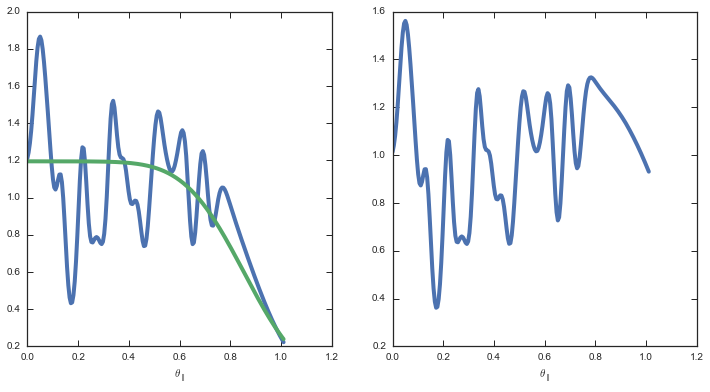

In [9]:
m=10.**5.5
sdf_pepper.simulate(rate=dNencdm(m,Xrs=3.),
                            sample_GM=lambda: m/10.**10./bovy_conversion.mass_in_1010msol(V0,R0),
                            sample_rs=lambda x: rs(x*bovy_conversion.mass_in_1010msol(V0,R0)*10.**10.),
                            Xrs=3.)
print len(sdf_pepper._timpact)
apars= numpy.linspace(0.,sdf_pepper.length(),201)
xs= apars
dens_1e5= numpy.array([sdf_pepper.density_par(x) for x in xs])
figsize(12,6)
subplot(1,2,1)
plot(xs,dens_1e5/numpy.sum(dens_1e5)/(xs[1]-xs[0]),lw=4.)
plot(xs,sdf_pepper._dens_unp/numpy.sum(sdf_pepper._dens_unp)/(xs[1]-xs[0]),lw=4.)
xlabel(r'$\theta_\parallel$')
subplot(1,2,2)
plot(xs,(dens_1e5/numpy.sum(dens_1e5))/(sdf_pepper._dens_unp/numpy.sum(sdf_pepper._dens_unp)),lw=4.)
xlabel(r'$\theta_\parallel$')

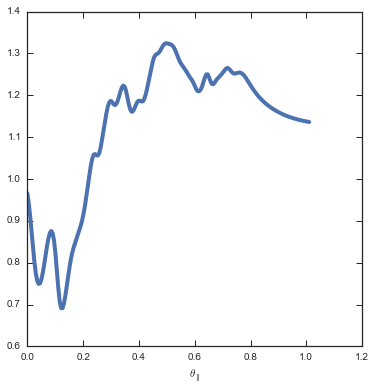

In [10]:
mO_1e6= numpy.array([sdf_pepper.meanOmega(x,oned=True) for x in xs])
mO_unp= sdf_pepper._mO_unp
figsize(6,6)
plot(xs,mO_1e6/mO_unp,lw=4.)
xlabel(r'$\theta_\parallel$')

/Users/bovy/anaconda/lib/python2.7/site-packages/matplotlib/axes/_base.py:1057: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal
  if aspect == 'normal':

/Users/bovy/anaconda/lib/python2.7/site-packages/matplotlib/axes/_base.py:1062: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal
  elif aspect in ('equal', 'auto'):



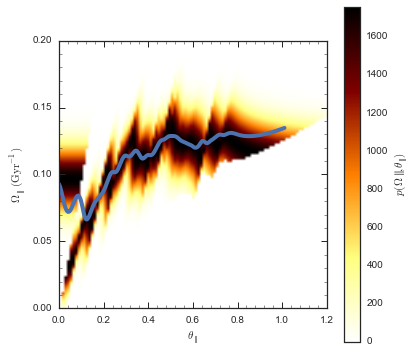

In [11]:
mO_1e6= numpy.array([sdf_pepper.meanOmega(x,oned=True) for x in xs])
Opars= numpy.linspace(0.,0.2,101)/bovy_conversion.freq_in_Gyr(V0,R0)
papars= numpy.linspace(0.,1.2,101)
y= numpy.array([sdf_pepper.pOparapar(Opars,a) for a in papars])
figsize(6,6)
bovy_plot.bovy_dens2d(y.T,
                      origin='lower',
                      cmap='afmhot_r',colorbar=True,
                      vmin=0.,
                      xrange=[papars[0],papars[-1]],
                      yrange=[Opars[0]*bovy_conversion.freq_in_Gyr(V0,R0),
                              Opars[-1]*bovy_conversion.freq_in_Gyr(V0,R0)],
                     zlabel=r'$p(\Omega\parallel,\theta_\parallel)$')
plot(xs,mO_1e6*bovy_conversion.freq_in_Gyr(V0,R0),lw=4.)
xlabel(r'$\theta_\parallel$')
ylabel(r'$\Omega_\parallel\,(\mathrm{Gyr}^{-1})$')

In [12]:
sdf_smooth.length(ang=True), sdf_smooth.length(phys=True), sdf_smooth.length()

(93.22986881299093, 12.370921687034848, 0.9869428439749178)

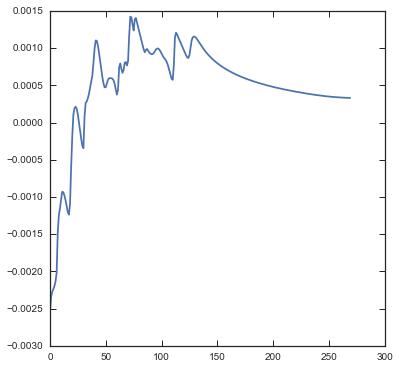

In [13]:
plot(sdf_pepper._sgapdfs_uniq[0]._kick_dOaparperp[:,2])

(200, 250)

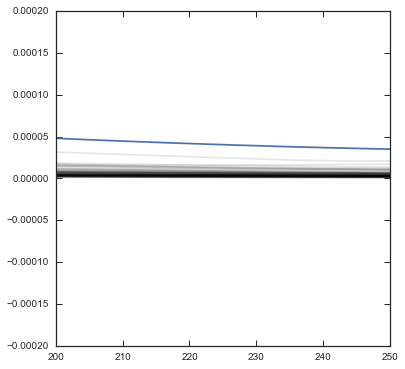

In [14]:
for ii in range(len(sdf_pepper._timpact)):
    plot(sdf_pepper._sgapdfs[ii]._kick_dOaparperp[:,2],color='k',alpha=0.1)
plot(sdf_pepper._sgapdfs_uniq[0]._kick_dOaparperp[:,2]/10.)
ylim(-0.0002,0.0002)
xlim(200,250)

In [15]:
sdf_pepper._sgapdfs_uniq[0]._nKickPoints

270

In [16]:
dNencdm(10.**5.5)

73.472427438682587

In [17]:
1./px/numpy.pi*180.

array([         inf,  45.3139462 ,  22.6569731 ,  15.10464873,
        11.32848655,   9.06278924,   7.55232437,   6.47342089,
         5.66424327,   5.03488291,   4.53139462,   4.11944965,
         3.77616218,   3.48568817,   3.23671044,   3.02092975,
         2.83212164,   2.66552625,   2.51744146,   2.38494454,
         2.26569731,   2.15780696,   2.05972483,   1.97017157,
         1.88808109,   1.81255785,   1.74284408,   1.6782943 ,
         1.61835522,   1.56254987,   1.51046487,   1.4617402 ,
         1.41606082,   1.37314988,   1.33276312,   1.29468418,
         1.25872073,   1.22470125,   1.19247227,   1.16189606,
         1.13284865,   1.1052182 ,   1.07890348,   1.0538127 ,
         1.02986241,   1.00697658,   0.98508579,   0.96412651,
         0.94404055,   0.92477441,   0.90627892,   0.88850875,
         0.87142204,   0.85498012,   0.83914715,   0.82388993,
         0.80917761,   0.79498151,   0.78127493,   0.76803299,
         0.75523244,   0.74285158,   0.7308701 ,   0.71

In [18]:
dNencdm(10.**5.5)

73.472427438682587